# Predicting Wine Preference Using Objective Qualities
### Noah Rissman, Mathew Fischbach, and John Foley
### rissm007@umn.edu, fisch872@umn.edu, foley406@umn.edu
### IDs: 4697205, 4695783, 5448630
### CSCI 5523 - Spring 2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

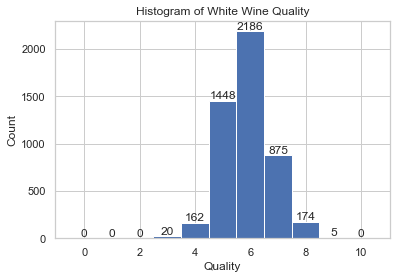

<Figure size 432x288 with 0 Axes>

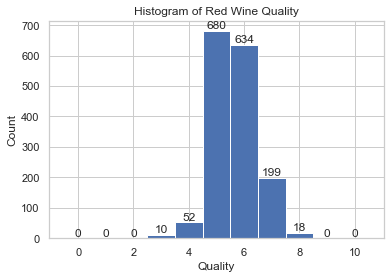

<Figure size 432x288 with 0 Axes>

In [1]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing and cleaning
data_path = r'winequalityN.csv'
wine = pd.read_csv(data_path)

# explore whole data set
print(wine.info())
print(wine.describe())

# splitting  red/white datasets
white = wine[wine['type'] == 'white']
red = wine[wine['type'] == 'red']

# removing 'type' columns
white = white.drop(columns = ['type'])
red = red.drop(columns = ['type'])

# dropping records w/ missing values
white = white.dropna()
red = red.dropna()

bins = [0,1,2,3,4,5,6,7,8,9,10,11]

# white wine
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,1)
ax.hist(white['quality'], bins=bins, align='left')
ax.set_title('Histogram of White Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()

# red wine
fig, ax = plt.subplots(1,1)
ax.hist(red['quality'], bins=bins, align='left')
ax.set_title('Histogram of Red Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
sns.set(style="whitegrid")
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()
              
# dropping 'outliers', i.e., records w/ 'quality' values of 3 or 9
white = white[(white.quality != 3) & (white.quality != 9)]
red = red[(red.quality != 3) & (red.quality != 9)]


# Exploratory Analysis of Each Wine


White Wine

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4845.000000       4845.000000  4845.000000     4845.000000   
mean        6.851465          0.277822     0.334138        6.396698   
std         0.836641          0.100322     0.121085        5.071325   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4845.000000          4845.000000           4845.000000  4845.000000   
mean      0.045755            35.244788            138.230031     0.994025   
std       0.021692            16.447952             42.000798     0.002993   
min       0.009000             2.00

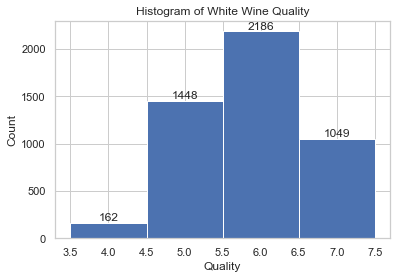

<Figure size 432x288 with 0 Axes>

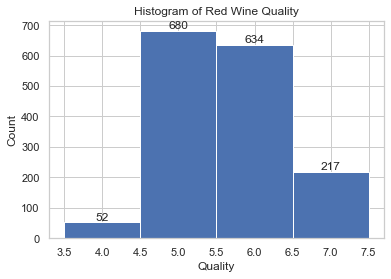

<Figure size 432x288 with 0 Axes>

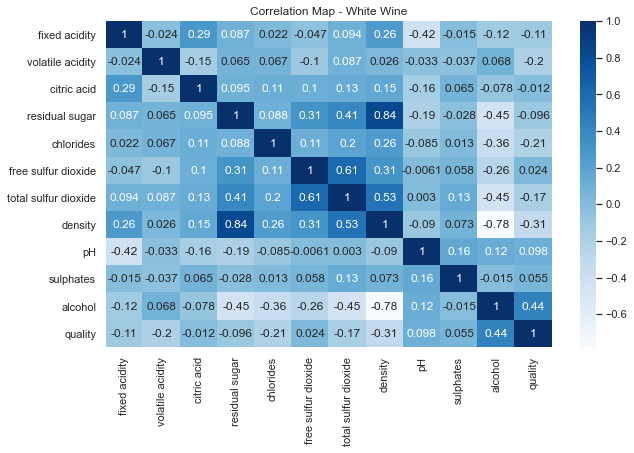

<Figure size 432x288 with 0 Axes>

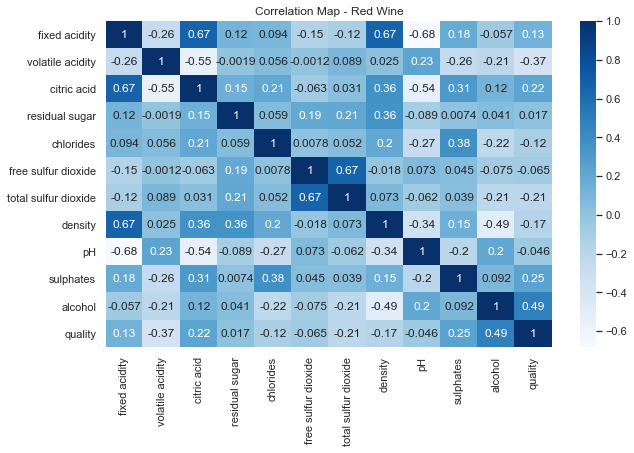

<Figure size 432x288 with 0 Axes>

In [2]:
# Data summary (mean, median, standard deviation, etc.)
# White wine
print("\nWhite Wine\n")
print(white.describe())
print(white.info())

# Red wine
print("\n\nRed Wine\n")
print(red.describe())
print(red.info())


## Data visualizations

labels = [4, 5, 6, 7, 8]
# Histograms
# White wine
fig, ax = plt.subplots(1,1)
ax.hist(white['quality'], bins=labels, align='left')
ax.set_title('Histogram of White Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
sns.set(style="whitegrid")
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()

# Red wine
fig, ax = plt.subplots(1,1)
ax.hist(red['quality'], bins=labels, align='left')
ax.set_title('Histogram of Red Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
sns.set(style="whitegrid")
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()
# It appears that quality of both red and white wine follows roughly a normal distribution

# Correlation maps
# White wine
plt.figure(figsize=(10,6))
corr_white = sns.heatmap(white.corr(), annot=True, cmap='Blues')
corr_white.set_title('Correlation Map - White Wine')
plt.show()
plt.clf()
# Red wine
plt.figure(figsize=(10,6))
corr_red = sns.heatmap(red.corr(), annot=True, cmap='Blues')
corr_red.set_title('Correlation Map - Red Wine')
plt.show()
plt.clf()
# Alcohol content has highest correlation with quality for both red and white wine

# Train/Test Split and Data Standardizations

In [3]:
from sklearn.feature_selection import SelectKBest
def FeatureSelection(k, df, x_train, y_train, x_test, y_test):
    s = SelectKBest(k=k).fit(x_train, y_train)
    mask = s.get_support(True)
    selected_features = df.columns[mask].tolist()
    train_selected = SelectKBest(k=k).fit_transform(x_train, y_train)
    test_selected = SelectKBest(k=k).fit_transform(x_test, y_test)
    return train_selected, test_selected, selected_features




# Paper did a 2/3 1/3 split
# can easily be adjusted for preliminary models with test_size=0.33
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
test_size = 0.15

# Red wine
red_x = red.drop(['quality'], axis=1)
red_y = red['quality']
red_train_x, red_test_x, red_train_y, red_test_y = train_test_split(red_x, red_y, test_size=test_size, random_state=42, shuffle=True, stratify=red_y)
red_train_y = red_train_y.to_numpy()
red_test_y = red_test_y.to_numpy()

# White wine
white_x = white.drop(['quality'], axis=1)
white_y = white['quality']
white_train_x, white_test_x, white_train_y, white_test_y = train_test_split(white_x, white_y, test_size=test_size, random_state=42, shuffle=True, stratify=white_y)
white_train_y = white_train_y.to_numpy()
white_test_y = white_test_y.to_numpy()
              
# Creating index of features
features = white_train_x.columns

# Standardizing feature values
scaler = StandardScaler()
white_train_x = scaler.fit_transform(white_train_x)
white_test_x = scaler.fit_transform(white_test_x)
red_train_x = scaler.fit_transform(red_train_x)
red_test_x = scaler.fit_transform(red_test_x)


White selected features, in order: [['alcohol'], ['density'], ['volatile acidity'], ['total sulfur dioxide'], ['chlorides'], ['residual sugar'], ['free sulfur dioxide'], ['fixed acidity'], ['pH'], ['sulphates'], ['citric acid']]

Red selected features, in order: [['alcohol'], ['volatile acidity'], ['total sulfur dioxide'], ['sulphates'], ['citric acid'], ['density'], ['chlorides'], ['fixed acidity'], ['free sulfur dioxide'], ['pH'], ['residual sugar']]


# Experimenting with Feature Selection

In [ ]:
# Defining difference function in order to see what order features are selected
def diff(l1, l2):
    return (list(list(set(l1)-set(l2))+ list(set(l2)-set(l1))))

l_red = []
l_white = []
sel_features_inorder_white = []
sel_features_inorder_red = []
for i in range(1, 12):
    white_train, white_test, white_selected_features = FeatureSelection(i, white_x, white_train_x, white_train_y, white_test_x, white_test_y)
    l_white.append(white_selected_features)
    red_train, red_test, red_selected_features = FeatureSelection(i, red_x, red_train_x, red_train_y, red_test_x, red_test_y)
    l_red.append(red_selected_features)
    if i == 1:
        sel_features_inorder_white.append(l_white[0])
        sel_features_inorder_red.append(l_red[0])
    else:
        sel_features_inorder_white.append(diff(l_white[i-1], l_white[i-2]))
        sel_features_inorder_red.append(diff(l_red[i-1], l_red[i-2]))
        
print(f'White selected features, in order: {sel_features_inorder_white}')
print()
print(f'Red selected features, in order: {sel_features_inorder_red}')

# TSNE Visualization

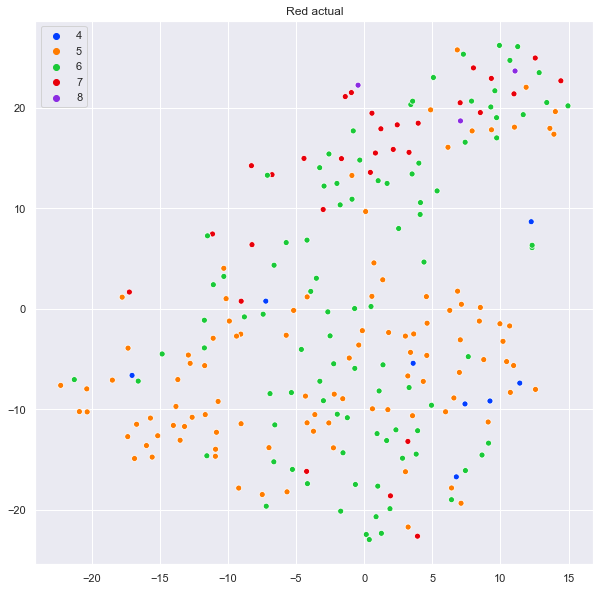

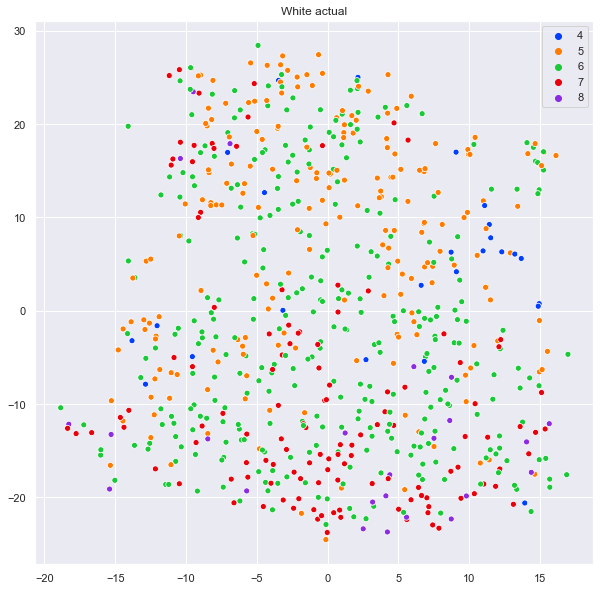

In [4]:
from sklearn.manifold import TSNE

def two_dimensional_representation(x_data,y_data,title="t-SNE wine",perplexity = 50):
    tsne = TSNE(verbose=0, perplexity=perplexity, random_state = 42)
    X_embedded_data = tsne.fit_transform(x_data)

    # sns settings
    sns.set(rc={'figure.figsize':(10,10)})

    # colors
    palette = sns.color_palette("bright", len(set(y_data)))

    # plot
    sns.scatterplot(X_embedded_data[:,0], X_embedded_data[:,1], hue = y_data, palette=palette)

    plt.title(title)
    # plt.savefig("plots/t-sne_wine.png")
    plt.show()

two_dimensional_representation(red_test_x,red_test_y,"Red actual",20)
two_dimensional_representation(white_test_x,white_test_y,"White actual",50)


# Helper Functions/Variables and Imports

In [5]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

def confusion(test, pred, labels, title):
    d = confusion_matrix(test, pred, labels = labels)
    df_cm = pd.DataFrame(d, columns = labels, index = labels)
    df_cm.columns.name = 'Predicted'
    df_cm.index.name = 'Actual'
    cm = sns.heatmap(df_cm, cmap = 'Blues', linewidths = 0.1, annot=True, fmt = 'd')
    cm.tick_params(left = False, bottom = False)
    cm.set_title(title)
    plt.show()
    plt.clf()

def plot_metrics(df, metric, color):
    sns.set(style="whitegrid")
    sns.despine(left=True)
    d = df[(df.Color==color)]
    print(d)
    plot = sns.barplot(x=d['Classifier'], y=d[metric])
    plt.title(f'Classification {metric} - {color} Wine dataset')
    if metric == 'SSE':
        fmt = '0.0f'
    else:
        fmt = '0.5f'
    for p in plot.patches:
        plot.annotate(format(p.get_height(), fmt),
                      (p.get_x() + p.get_width()/2, p.get_height()), 
                       ha = 'center', va = 'center',
                       xytext = (0,-20), 
                       textcoords = 'offset points', color = 'white')
    plt.show()
    plt.clf()
    
# defining SSE
def SSE(actual, pred):
    s = 0
    for i in range(len(actual)):
        s += abs(actual[i]-pred[i])**2
    return s

#Prints aout SSE and Accuracy Data and prints out graph
#Example
#svm_function(white_train_x, white_train_y, white_test_x, white_test_y)
#data_analyze("White", white_svm, "SVM")
score_df_col = ["Classifier", "Color", "Accuracy", "SSE"]
score_df = pd.DataFrame(columns=score_df_col)

def data_analyze(test_y, y_pred, wine_color, classifier_name):
    wine_color = wine_color.title()
    labels = [4,5,6,7,8]

    acc = accuracy_score(test_y, y_pred)
    SSE_data = SSE(test_y, y_pred)
    score_df.loc[len(score_df.index)] = [classifier_name, wine_color, acc, SSE_data]
    
    print (f"Accuracy for {classifier_name} on {wine_color} dataset is {acc}")
    print (f"SSE for {classifier_name} on {wine_color} dataset is {SSE_data}")
    title = f"{classifier_name} - {wine_color} Wine"
    confusion(test_y, y_pred, labels, title)


def ROC_AUC(y_pred, y_true, pos_group=None):
    fpr, tpr, thresholds = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=pos_group)
    auc_result = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_result

def plotROCAUC(df, df2, classes, micro_fpr, micro_tpr, micro_roc_auc):
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate( [df2['fpr'][i] for i in classes] ))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in classes:
        mean_tpr += np.interp(all_fpr, df2['fpr'][i], df2['tpr'][i])
    # Finally average it and compute AUC
    mean_tpr /= len(classes)
    macro_fpr = all_fpr
    macro_tpr = mean_tpr
    macro_roc_auc = metrics.auc(macro_fpr, macro_tpr)
    # Plot ROC AUC curves
    lw = 2
    plt.figure(figsize=(10,6))
    plt.plot(micro_fpr, micro_tpr, label='micro-average ROC curve (area = {0:0.2f})'.format(micro_roc_auc),
         color='deeppink', linestyle=':', linewidth=4)
    plt.plot(macro_fpr, macro_tpr, label='macro-average ROC curve (area = {0:0.2f})'.format(macro_roc_auc),
         color='crimson', linestyle=':', linewidth=4)
    colors = ['aqua', 'darkorange', 'cyan', 'lightcoral', 'olive', 'fuchsia', 'indigo']
    for i, color in zip(classes, colors[:len(classes)]):
        plt.plot(df2['fpr'][i], df2['tpr'][i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(i, df['roc auc'][i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

def PR_AUC(y_pred, y_true, pos_group=None):
    avg_precision = metrics.average_precision_score(y_true=y_true, y_score=y_pred, pos_label=pos_group)
    precision, recall, thresholds = metrics.precision_recall_curve(y_true=y_true, probas_pred=y_pred, pos_label=pos_group)
    return precision, recall, avg_precision

def plotPRAUC(df, df2, classes, y_test, y_score, micro_precision, micro_recall, micro_avg_precision):
    # honeslty I don't know if this is portable or correct...meh
    # First aggregate all precision
    all_precision = np.unique(np.concatenate( [df2['precision'][i] for i in classes] ))
    # Then interpolate all pr curves at this points
    mean_recall = np.zeros_like(all_precision)
    for i in classes:
        mean_recall += np.interp(all_precision, df2['precision'][i], df2['recall'][i])
    # Finally average it and compute AUC
    mean_recall /= len(classes)
    macro_precision = all_precision
    macro_recall = mean_recall    
    macro_avg_precision = metrics.average_precision_score(y_true=y_test, y_score=y_score, pos_label=1)
    # macro_avg_precision_auc = metrics.auc(macro_precision, macro_recall)
    # print(macro_avg_precision_auc, macro_avg_precision)
    # average precision, also know as precision-recall area under the curve
    # Plot PR AUC curves
    lw = 2
    plt.figure(figsize=(10,6))
    plt.plot(micro_precision, micro_recall, label='micro-average PR curve (area = {0:0.2f})'.format(micro_avg_precision),
         color='deeppink', linestyle=':', linewidth=4)
    plt.plot(macro_precision, macro_recall, label='macro-average PR curve (area = {0:0.2f})'.format(macro_avg_precision),
         color='crimson', linestyle=':', linewidth=4)
    colors = ['aqua', 'darkorange', 'cyan', 'lightcoral', 'olive', 'fuchsia', 'indigo']
    for i, color in zip(classes, colors[:len(classes)]):
        plt.plot(df2['precision'][i], df2['recall'][i], color=color, lw=lw,
                label='PR curve of class {0} (area = {1:0.2f})'.format(i, df['pr avg prec'][i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall to multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Learn to predict each class against the other
def oneVsRestAnalysis(model, X_train, y_train, X_test, y_test, classes):
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.preprocessing import label_binarize

    # Binarize the output
    y_train = label_binarize(y_train, classes=classes)
    y_test = label_binarize(y_test, classes=classes)
    # create classifier for multi-label classification
    clf = OneVsRestClassifier(model)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    # Compute performance metrics
    curve_dict = { 'quality': [], 'fpr': [], 'tpr': [], 'precision': [], 'recall': [] }
    df_dict = { 'quality': [], 'roc auc': [], 'pr avg prec': [] } 
    for i,x in enumerate(classes):
        df_dict['quality'].append(x)
        curve_dict['quality'].append(x)
        # curves can't handle mutli-label, so only give column that correpsonds to binarized label with [:, i]
        fpr, tpr, roc_auc = ROC_AUC(y_true=y_test[:, i], y_pred=y_score[:, i], pos_group=1)
        curve_dict['fpr'].append(fpr)
        curve_dict['tpr'].append(tpr)
        df_dict['roc auc'].append(roc_auc)

        prec, recall, pr_avg_prec = PR_AUC(y_true=y_test[:, i], y_pred=y_score[:, i], pos_group=1)
        curve_dict['precision'].append(prec)
        curve_dict['recall'].append(recall)
        df_dict['pr avg prec'].append(pr_avg_prec)

    # Compute micro-averages 
    micro_fpr, micro_tpr, micro_roc_auc = ROC_AUC(y_true=y_test.ravel(), y_pred=y_score.ravel(), pos_group=1)
    micro_precision, micro_recall, micro_avg_precision = PR_AUC(y_true=y_test.ravel(), y_pred=y_score.ravel(), pos_group=1)

    # Analyze roc_auc and pr_auc for the classes
    df = pd.DataFrame.from_dict(df_dict)
    df.set_index('quality', inplace=True)

    df2 = pd.DataFrame.from_dict(curve_dict)
    df2.set_index('quality', inplace=True)

    plotROCAUC(df, df2, classes, micro_fpr, micro_tpr, micro_roc_auc)

    plotPRAUC(df, df2, classes, y_test, y_score, micro_precision, micro_recall, micro_avg_precision)


# Trivial Classifier
### Predicts the mode of the training set for all records; this will serves as baseline for performance

Accuracy for Trivial on White dataset is 0.4511691884456671
SSE for Trivial on White dataset is 552


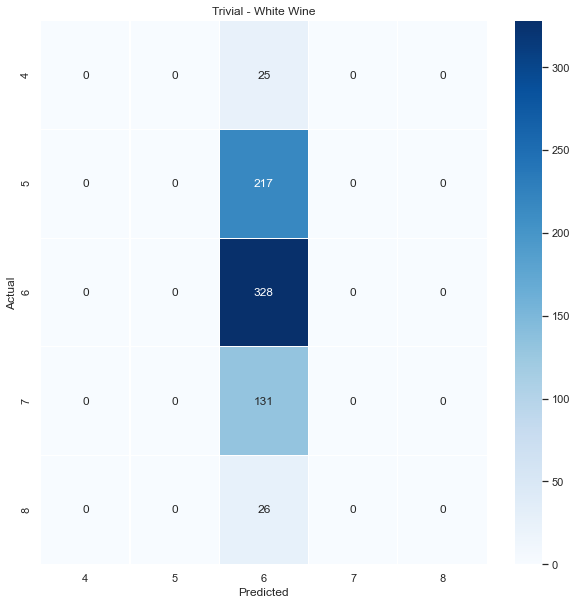

Accuracy for Trivial on Red dataset is 0.42857142857142855
SSE for Trivial on Red dataset is 250


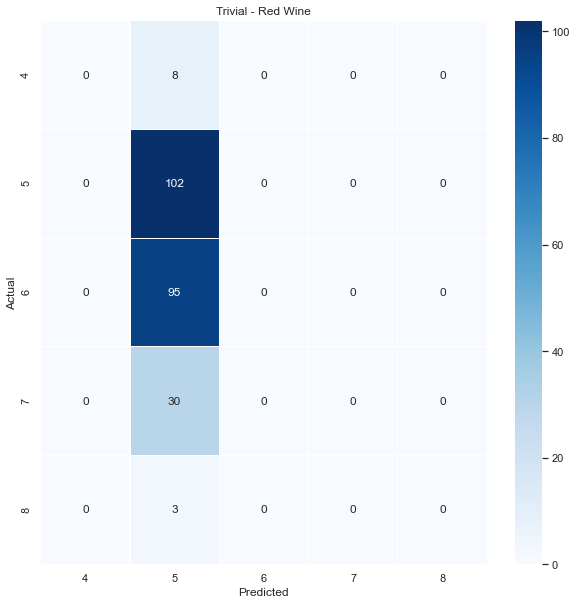

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

<Figure size 720x720 with 0 Axes>

In [6]:
from scipy import stats

def do_trivial(train_y, test_y, color):
    pred = np.full(test_y.shape, stats.mode(train_y)[0])
    data_analyze(test_y, pred, color, 'Trivial')
    return pred

do_trivial(white_train_y, white_test_y, 'White')
do_trivial(red_train_y, red_test_y, 'Red')

# Replicating Original Authors' SVM

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Accuracy for Auth-SVM on White dataset is 0.6836313617606602
SSE for Auth-SVM on White dataset is 319.0


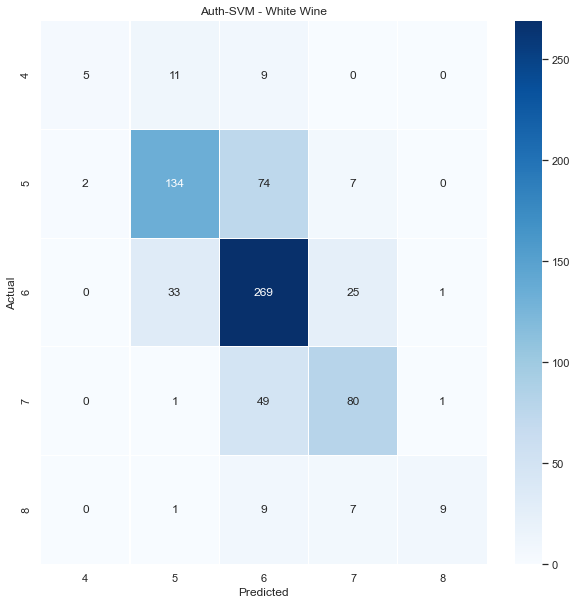

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Accuracy for Auth-SVM on Red dataset is 0.6302521008403361
SSE for Auth-SVM on Red dataset is 103.0


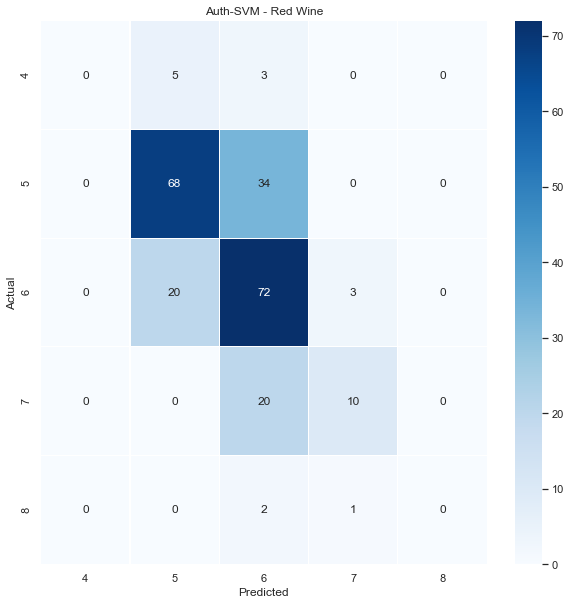

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.8s finished


Accuracy for Auth-SVM on Authors-White dataset is 0.6740027510316369
SSE for Auth-SVM on Authors-White dataset is 338.0


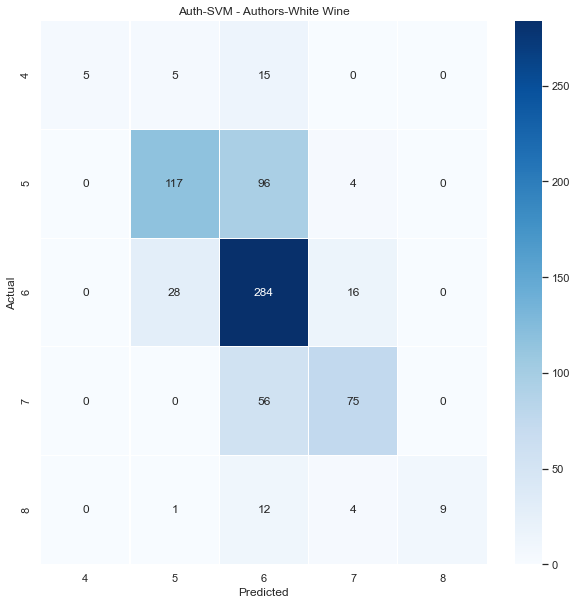

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


Accuracy for Auth-SVM on Authors-Red dataset is 0.6764705882352942
SSE for Auth-SVM on Authors-Red dataset is 92.0


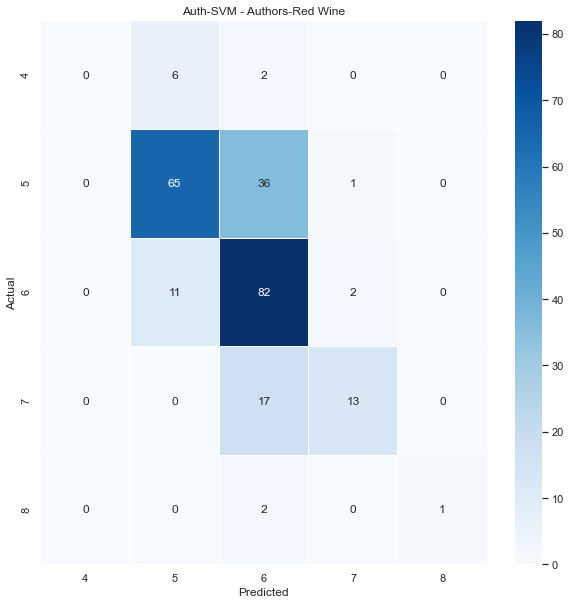

Fitting 5 folds for each of 380 candidates, totalling 1900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed: 22.1min finished


best parameters: {} {'C': 2, 'gamma': 0.6951927961775606}
best score: {} 0.452241332104016
MAE: {} 0.3562585969738652
[[  5  11   9   0   0]
 [  2 134  74   7   0]
 [  0  33 269  25   1]
 [  0   1  49  80   1]
 [  0   1   9   7   9]]
[0.71428571 0.74444444 0.65609756 0.67226891 0.81818182]
Fitting 5 folds for each of 380 candidates, totalling 1900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best parameters: {} {'C': 1, 'gamma': 0.07847599703514611}
best score: {} 0.38381892593935174
MAE: {} 0.3907563025210084
[[ 0  5  3  0  0]
 [ 0 68 34  0  0]
 [ 0 20 72  3  0]
 [ 0  0 20 10  0]
 [ 0  0  2  1  0]]
[0.         0.7311828  0.54961832 0.71428571 0.        ]


[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed:  2.5min finished


<Figure size 720x720 with 0 Axes>

In [7]:
from sklearn.svm import SVR
def Authors_SVM(x_train, y_train, x_test, y_test, color=None):
    # using gamma values that the authors found were the best
    white_gamma = 2**1.55  # 2.928
    red_gamma = 2**0.19  # 1.14
    gamma = np.logspace(-3, 6, 20, 2)
    grid_search = {'C':range(1,20), 'gamma':gamma}
    best_w = {'C': [2], 'gamma': [0.6951927961775606]}
    best_r = {'C': [1], 'gamma': [0.07847599703514611]}
    author_params = {'C':[3], 'gamma':[white_gamma, red_gamma]}
    svm_clf = SVR(kernel='rbf')
    param=None
    if color == 'white':
        param = best_w
    elif color == 'red':
        param = best_r
    elif color == 'authors-red' or color == 'authors-white':
        param = author_params
    else:  # no color given then seraches for best scores
        param = grid_search

    clf = GridSearchCV(svm_clf, param, n_jobs=1, verbose=True, cv=5)

    #new_x_train, new_x_test = FeatureSelection(11, x_train, y_train, x_test, y_test)
    new_x_train = x_train
    new_x_test = x_test
    clf.fit(new_x_train, y_train)
    y_pred = clf.predict(new_x_test)
    y_pred = np.rint(y_pred)  # round predictions to nearest integer for classification

    if color == 'white' or color == 'red' or color == 'authors-red' or color == 'authors-white':
        data_analyze(y_test, y_pred, color, "Auth-SVM")

    if color==None:
        print('best parameters: {}', clf.best_params_)
        print('best score: {}', clf.best_score_)
        print("MAE: {}", mean_absolute_error(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
        print(precision_score(y_test, y_pred, average=None, zero_division=0))

Authors_SVM(white_train_x, white_train_y, white_test_x, white_test_y, 'white')
Authors_SVM(red_train_x, red_train_y, red_test_x, red_test_y, 'red')
Authors_SVM(white_train_x, white_train_y, white_test_x, white_test_y, 'authors-white')
Authors_SVM(red_train_x, red_train_y, red_test_x, red_test_y, 'authors-red')
Authors_SVM(white_train_x, white_train_y, white_test_x, white_test_y)
Authors_SVM(red_train_x, red_train_y, red_test_x, red_test_y)


# K-means Clustering

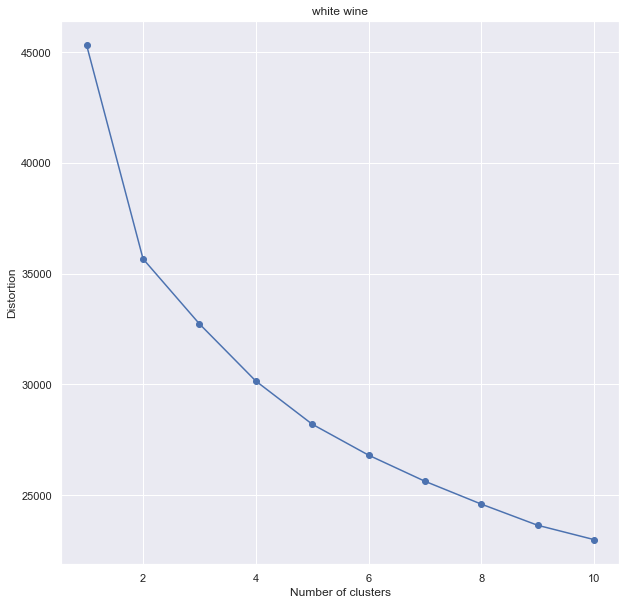

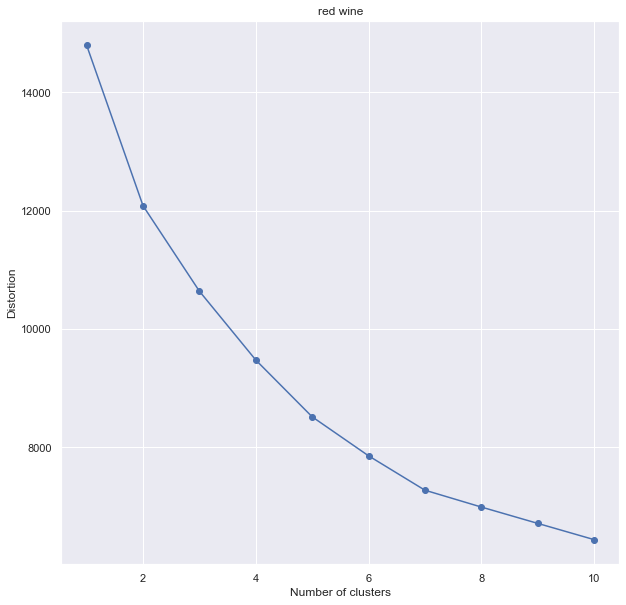

In [8]:
from sklearn.cluster import KMeans
def K_means(x_train, y_train, x_test, y_test, title = "Wine"):
    distortions = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, verbose=False, random_state=42)
        kmeans.fit(x_train, y_train)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title(title)
    plt.show()

K_means(white_train_x, white_train_y, white_test_x, white_test_y,"white wine")
K_means(red_train_x, red_train_y, red_test_x, red_test_y,"red wine")

# Radius Nearest Neighbors

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Accuracy for RNC on White dataset is 0.6024759284731774
SSE for RNC on White dataset is 361.0


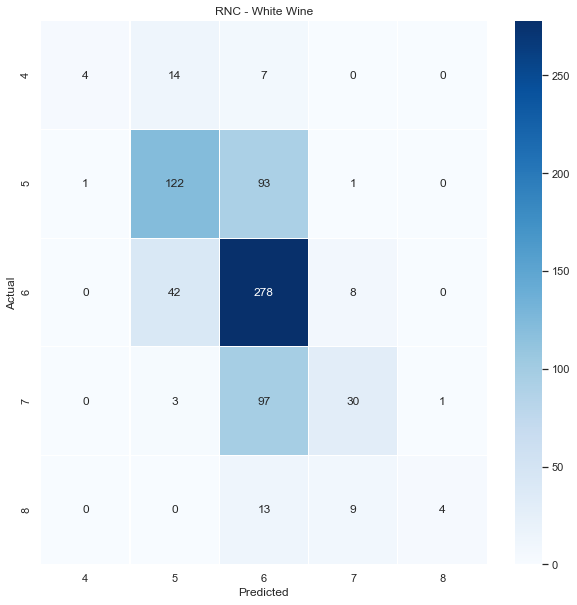

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Accuracy for RNC on Red dataset is 0.6428571428571429
SSE for RNC on Red dataset is 97.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


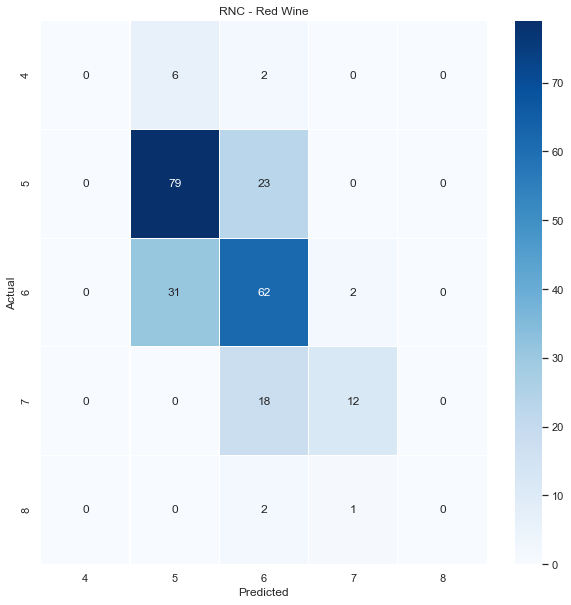

<Figure size 720x720 with 0 Axes>

In [9]:
from sklearn.neighbors import RadiusNeighborsClassifier
def RNC(x_train, y_train, x_test, y_test, color=None):
    grid_search = {
        'weights': ['uniform', 'distance'],
        'radius': np.arange(1.0, 11.0, 0.5),
        'n_jobs': [1],
        'outlier_label':['most_frequent'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
        }
    best_w = {'algorithm': ['ball_tree'], 'n_jobs': [1], 'outlier_label': ['most_frequent'], 'radius': [2.5], 'weights': ['distance']}
    best_r = {'algorithm': ['ball_tree'], 'n_jobs': [1], 'outlier_label': ['most_frequent'], 'radius': [2.5], 'weights': ['distance']}
    param=None
    if color == 'white':
        param = best_w
    elif color == 'red':
        param = best_r
    else:
        param = grid_search
    model = RadiusNeighborsClassifier()
    clf = GridSearchCV(model, param, n_jobs=1, verbose=True, cv=3)  # cv=3 so that we have enough classes in each k-fold

    new_x_train, new_x_test, selected_features = FeatureSelection(11, red_x, x_train, y_train, x_test, y_test)
    # new_x_train = x_train
    # new_x_test = x_test
    clf.fit(new_x_train, y_train)
    y_pred = clf.predict(new_x_test)


    y_pred = np.rint(y_pred)  # round predictions to nearest integer for classification

    if color == 'white' or color == 'red':
        data_analyze(y_test, y_pred, color, "RNC")

    if color==None:
        print('best parameters: {}', clf.best_params_)
        print('best score: {}', clf.best_score_)
        print("MAE: {}", mean_absolute_error(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
        print(precision_score(y_test, y_pred, average=None, zero_division=0))
    
RNC(white_train_x, white_train_y, white_test_x, white_test_y, 'white')
RNC(red_train_x, red_train_y, red_test_x, red_test_y, 'red')


# Decision Tree

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished



Accuracy for DT on White dataset is 0.6052269601100413
SSE for DT on White dataset is 410


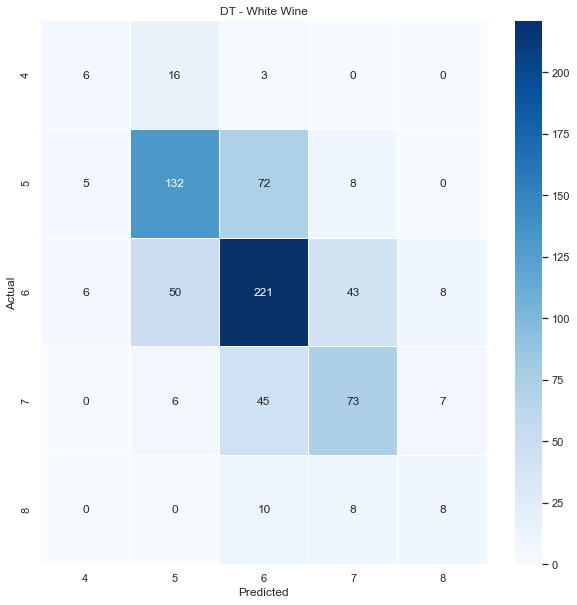

Accuracy for DT on Red dataset is 0.6176470588235294
SSE for DT on Red dataset is 144


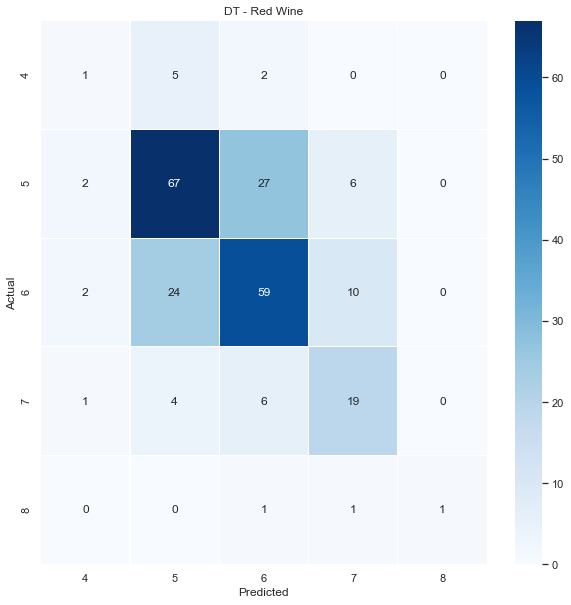

Feature Importances - White Dataset
                 Feature  Importance
10               alcohol    0.159410
5    free sulfur dioxide    0.119778
1       volatile acidity    0.108710
3         residual sugar    0.093035
6   total sulfur dioxide    0.086798
4              chlorides    0.080920
2            citric acid    0.078773
7                density    0.078202
8                     pH    0.070396
9              sulphates    0.066763
0          fixed acidity    0.057215
Feature Importances - Red Dataset
                Feature  Importance
3               alcohol    0.276427
1  total sulfur dioxide    0.261046
2             sulphates    0.259256
0      volatile acidity    0.203272
Best decision tree parameters for white: 11 features, max depth of 417, max leaf nodes of 830, entropy criterion.
Best decision tree parameters for red: 4 features, max depth of 672, max leaf nodes of 827, gini criterion.


<Figure size 720x720 with 0 Axes>

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
def do_tree(train_x, train_y, test_x, test_y, params, color):
    dt = tree.DecisionTreeClassifier(max_depth = params['max_depth'],
                                      max_leaf_nodes = params['max_leaf_nodes'],
                                      criterion = params['criterion'],
                                      random_state = 42)
    d = dt.fit(train_x, train_y)
    pred = d.predict(test_x)
    data_analyze(test_y, pred, color, 'DT')
    importances = d.feature_importances_
    return pred, importances

def optimize_tree(df, x_train, y_train, x_test, y_test, params):
    n = []
    parameters = []
    accuracy = []
    sse = []
    for i in range(1,12):
        n.append(i)
        train, test, x = FeatureSelection(i, df, x_train, y_train, x_test, y_test)
        dt = tree.DecisionTreeClassifier(random_state = 42)
        clf = RandomizedSearchCV(dt, params, n_jobs=1, n_iter=10, verbose=True, random_state=42, cv=3)
        clf.fit(train, y_train)
        p = clf.best_params_
        parameters.append(p)
        d = tree.DecisionTreeClassifier(max_depth = p['max_depth'],
                                      max_leaf_nodes = p['max_leaf_nodes'],
                                      criterion = p['criterion'],
                                      random_state = 42)
        d2 = d.fit(train, y_train)
        pred = d2.predict(test)
        acc = accuracy_score(y_test, pred)
        s = SSE(y_test, pred)
        accuracy.append(acc)
        sse.append(s)
    data = {'Number of Features': n, 'Parameters': parameters, 'Accuracy': accuracy, 'SSE': sse}
    dataframe = pd.DataFrame(data = data)
    best = dataframe.loc[dataframe['Accuracy'].idxmax()]
    best_k = best[0]
    best_params = best[1]
    return dataframe, best_k, best_params
    
parameters = {'max_depth':range(1,1000), 'criterion' :['gini', 'entropy'],
              'max_leaf_nodes':range(1,1000)}

white_tree_df, white_tree_best_k, white_tree_best_params = optimize_tree(white_x, white_train_x, white_train_y, white_test_x, white_test_y, parameters)   
red_tree_df, red_tree_best_k, red_tree_best_params = optimize_tree(red_x, red_train_x, red_train_y, red_test_x, red_test_y, parameters)   

white_tree_train_selected, white_tree_test_selected, white_tree_selected_features = FeatureSelection(white_tree_best_k, white_x, white_train_x, white_train_y, white_test_x, white_test_y)
red_tree_train_selected, red_tree_test_selected, red_tree_selected_features = FeatureSelection(red_tree_best_k, red_x, red_train_x, red_train_y, red_test_x, red_test_y)

white_tree_pred, white_tree_importances = do_tree(white_tree_train_selected, white_train_y, white_tree_test_selected, white_test_y, white_tree_best_params, 'White')
red_tree_pred, red_tree_importances = do_tree(red_tree_train_selected, red_train_y, red_tree_test_selected, red_test_y, red_tree_best_params, 'Red')

wtdata = {'Feature': white_tree_selected_features, 'Importance': white_tree_importances}
rtdata = {'Feature': red_tree_selected_features, 'Importance': red_tree_importances}

white_importances_df = pd.DataFrame(data = wtdata)
red_importances_df = pd.DataFrame(data = rtdata)

print('Feature Importances - White Dataset')
print(white_importances_df.sort_values(by = 'Importance', ascending = False))
print('Feature Importances - Red Dataset')
print(red_importances_df.sort_values(by = 'Importance', ascending = False))

print(f'Best decision tree parameters for white: {white_tree_best_k} features, max depth of {white_tree_best_params["max_depth"]}, max leaf nodes of {white_tree_best_params["max_leaf_nodes"]}, {white_tree_best_params["criterion"]} criterion.')
print(f'Best decision tree parameters for red: {red_tree_best_k} features, max depth of {red_tree_best_params["max_depth"]}, max leaf nodes of {red_tree_best_params["max_leaf_nodes"]}, {red_tree_best_params["criterion"]} criterion.')

# Naive Bayes

Accuracy for GNB on White dataset is 0.4594222833562586
SSE for GNB on White dataset is 580


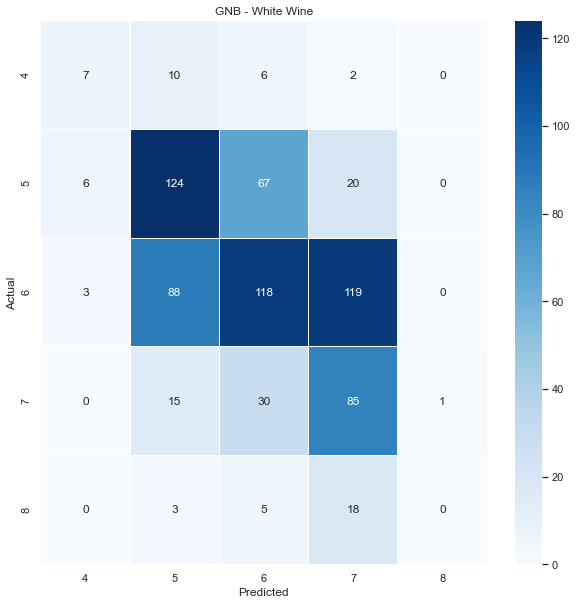

Accuracy for GNB on Red dataset is 0.5882352941176471
SSE for GNB on Red dataset is 140


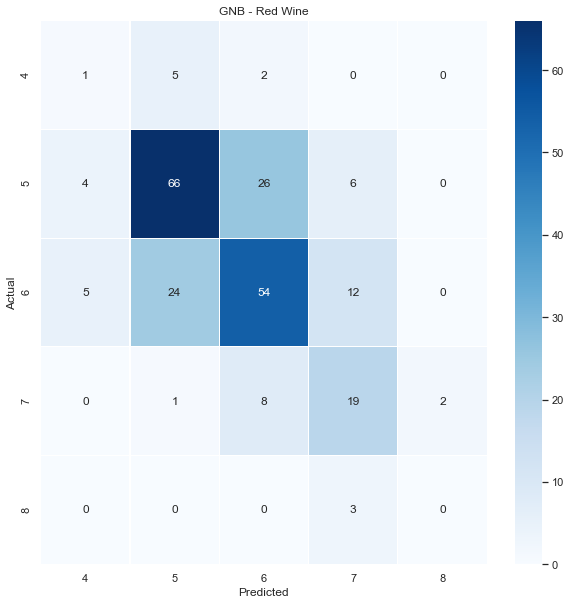

<Figure size 720x720 with 0 Axes>

In [11]:
from sklearn.naive_bayes import GaussianNB
def gaussian_nb(x_train, y_train, x_test, y_test, color):
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    data_analyze(y_test, y_pred, color, "GNB")

gaussian_nb(white_train_x, white_train_y, white_test_x, white_test_y,"White")
gaussian_nb(red_train_x, red_train_y, red_test_x, red_test_y,"Red")



# K-Nearest Neighbor

Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    7.0s finished


Accuracy for KNN on White dataset is 0.6753782668500687
SSE for KNN on White dataset is 331


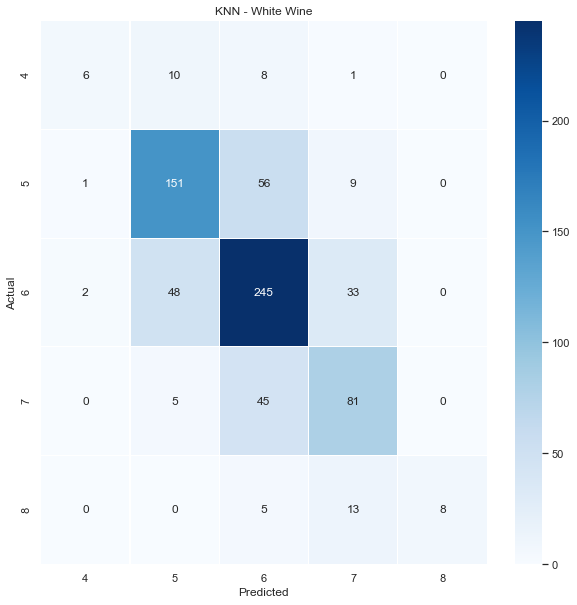

Accuracy for KNN on Red dataset is 0.6890756302521008
SSE for KNN on Red dataset is 89


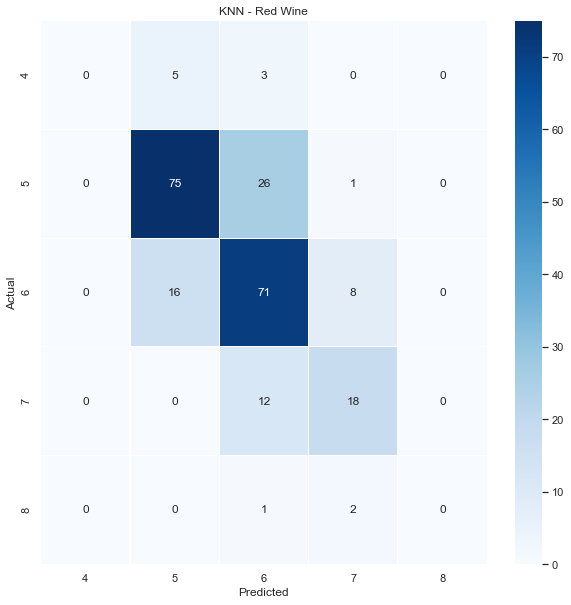

Best KNN parameters for white: 11 features, 14 neighbors, distance weights function.
Best KNN parameters for red: 11 features, 10 neighbors, distance weights function.


<Figure size 720x720 with 0 Axes>

In [12]:
from sklearn.neighbors import KNeighborsClassifier


def do_knn(train_x, train_y, test_x, test_y, params, color):
    k = KNeighborsClassifier(n_neighbors = params['n_neighbors'],
                           weights = params['weights'])
    k.fit(train_x, train_y)
    pred = k.predict(test_x)
    data_analyze(test_y, pred, color, 'KNN')
    return pred

def optimize_knn(df, x_train, y_train, x_test, y_test, params):
    n = []
    parameters = []
    accuracy = []
    sse = []
    for i in range(1,12):
        n.append(i)
        train, test, x = FeatureSelection(i, df, x_train, y_train, x_test, y_test)
        knn = KNeighborsClassifier()
        clf = GridSearchCV(knn, params, scoring='accuracy', n_jobs=1, verbose=True, cv=3)
        clf.fit(train, y_train)
        p = clf.best_params_
        parameters.append(p)
        k = KNeighborsClassifier(n_neighbors = p['n_neighbors'],
                           weights = p['weights'])
        k.fit(train, y_train)
        pred = k.predict(test)
        acc = accuracy_score(y_test, pred)
        s = SSE(y_test, pred)
        accuracy.append(acc)
        sse.append(s)
    data = {'Number of Features': n, 'Parameters': parameters, 'Accuracy': accuracy, 'SSE': sse}
    dataframe = pd.DataFrame(data = data)
    best = dataframe.loc[dataframe['Accuracy'].idxmax()]
    best_k = best[0]
    best_params = best[1]
    return dataframe, best_k, best_params

parameters = {'n_neighbors':range(1,20), 'weights':['uniform', 'distance']}

red_knn_df, red_knn_best_k, red_knn_best_params = optimize_knn(red_x, red_train_x, red_train_y, red_test_x, red_test_y, parameters)   
white_knn_df, white_knn_best_k, white_knn_best_params = optimize_knn(white_x, white_train_x, white_train_y, white_test_x, white_test_y, parameters)  

white_knn_train_selected, white_knn_test_selected, white_knn_selected_features = FeatureSelection(white_knn_best_k, white_x, white_train_x, white_train_y, white_test_x, white_test_y)
red_knn_train_selected, red_knn_test_selected, red_knn_selected_features = FeatureSelection(red_knn_best_k, red_x, red_train_x, red_train_y, red_test_x, red_test_y)

white_knn_pred = do_knn(white_knn_train_selected, white_train_y, white_knn_test_selected, white_test_y, white_knn_best_params, 'White')
red_knn_pred = do_knn(red_knn_train_selected, red_train_y, red_knn_test_selected, red_test_y, red_knn_best_params,  'Red')

print(f'Best KNN parameters for white: {white_knn_best_k} features, {white_knn_best_params["n_neighbors"]} neighbors, {white_knn_best_params["weights"]} weights function.')
print(f'Best KNN parameters for red: {red_knn_best_k} features, {red_knn_best_params["n_neighbors"]} neighbors, {red_knn_best_params["weights"]} weights function.')

# Support Vector Machine

Accuracy for SVM on White dataset is 0.5708390646492435
SSE for SVM on White dataset is 375


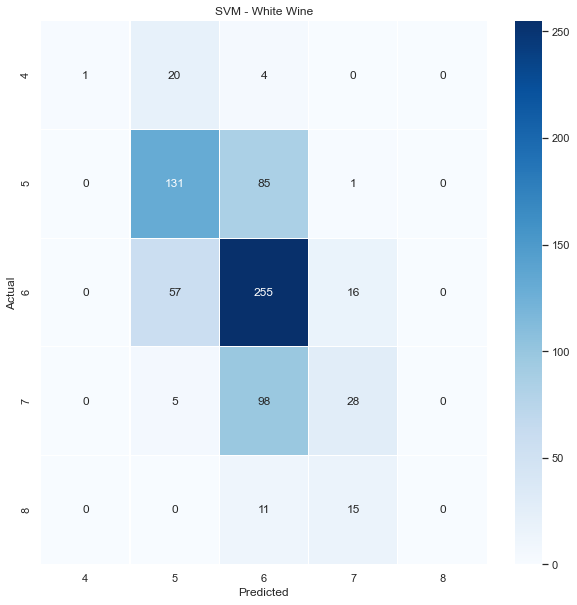

Accuracy for SVM on Red dataset is 0.6470588235294118
SSE for SVM on Red dataset is 99


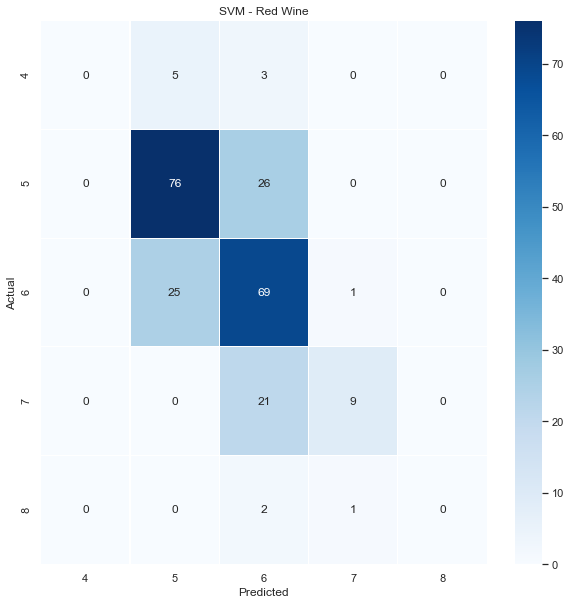

<Figure size 720x720 with 0 Axes>

In [13]:
from sklearn import svm
def svm_function(x_train, y_train, x_test, y_test, color):
    rbf = svm.SVC(kernel = 'rbf', random_state = 42)
    rbf.fit(x_train,y_train)
    y_pred = rbf.predict(x_test)
    data_analyze(y_test, y_pred, color, "SVM")

svm_function(white_train_x, white_train_y, white_test_x, white_test_y,"White")
svm_function(red_train_x, red_train_y, red_test_x, red_test_y,"Red")

# Neural Network (Multi-Layer Perceptron)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.3s finished


Accuracy for MLP on White dataset is 0.5543328748280605
SSE for MLP on White dataset is 384.0


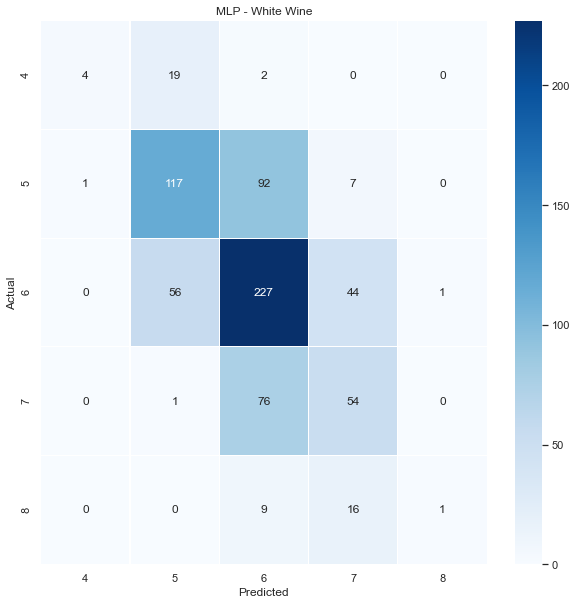

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.9s finished


Accuracy for MLP on Red dataset is 0.6386554621848739
SSE for MLP on Red dataset is 101.0


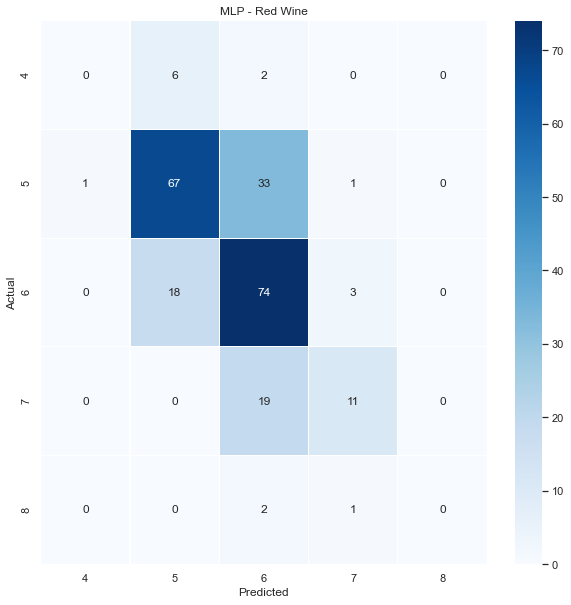

<Figure size 720x720 with 0 Axes>

In [14]:
from sklearn.neural_network import MLPRegressor

def MLP_Regressor(x_train, y_train, x_test, y_test, color=None):
    grid_search = {
        'activation': ['logistic', 'identity', 'tanh', 'relu'],
        'alpha': [0.01, 0.001, 0.0001, 0.00001],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'solver': ['lbfgs', 'sgd', 'adam'], 
        'random_state':[42],
        'max_iter': [500],
        }
    best_w = {'activation': ['relu'], 'alpha': [0.01], 'learning_rate': ['constant'], 'random_state': [42], 'solver': ['sgd'], 'max_iter': [100000]}
    best_r = {'activation': ['tanh'], 'alpha': [0.01], 'learning_rate': ['constant'], 'random_state': [42], 'solver': ['adam'], 'max_iter': [100000]}
    model = MLPRegressor()
    param = None
    if color == 'white': 
        param = best_w
    elif color == 'red':
        param = best_r
    else:
        param = grid_search
    clf = GridSearchCV(model, param, n_jobs=1, verbose=True, cv=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_pred = np.rint(y_pred)  # round predictions to nearest integer for classification

    if color == 'white' or color == 'red':
        data_analyze(y_test, y_pred, color, "MLP")

    if color==None:
        print('best parameters: {}', clf.best_params_)
        print('best score: {}', clf.best_score_)
        print("MAE: {}", mean_absolute_error(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
        print(precision_score(y_test, y_pred, average=None, zero_division=0))

MLP_Regressor(white_train_x, white_train_y, white_test_x, white_test_y, 'white')
MLP_Regressor(red_train_x, red_train_y, red_test_x, red_test_y, 'red')

# Plotting Performance
### Bar graphs to compare performance of classifiers

   Classifier  Color  Accuracy  SSE
0     Trivial  White  0.451169  552
2    Auth-SVM  White  0.683631  319
6         RNC  White  0.602476  361
8          DT  White  0.605227  410
10        GNB  White  0.459422  580
12        KNN  White  0.675378  331
14        SVM  White  0.570839  375
16        MLP  White  0.554333  384


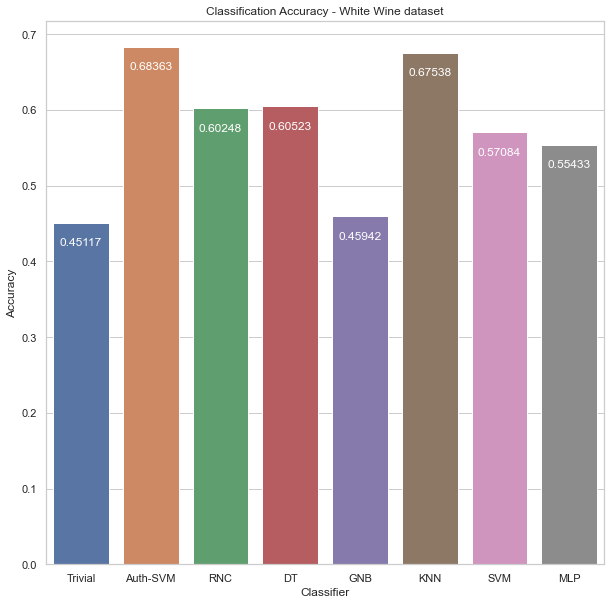

   Classifier Color  Accuracy  SSE
1     Trivial   Red  0.428571  250
3    Auth-SVM   Red  0.630252  103
7         RNC   Red  0.642857   97
9          DT   Red  0.617647  144
11        GNB   Red  0.588235  140
13        KNN   Red  0.689076   89
15        SVM   Red  0.647059   99
17        MLP   Red  0.638655  101


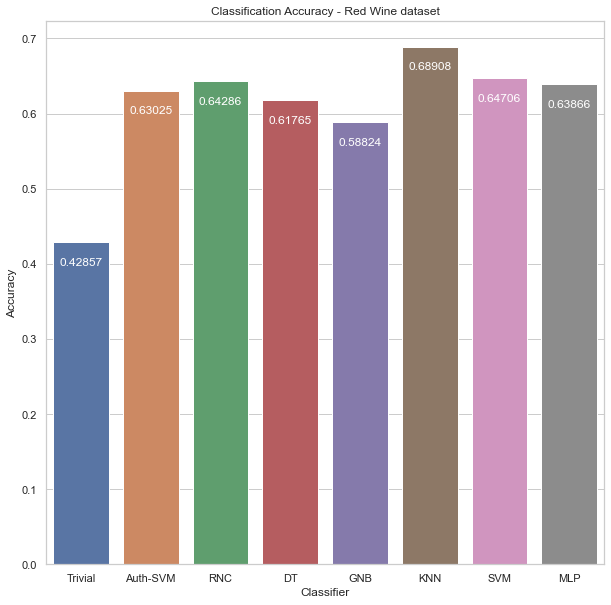

<Figure size 720x720 with 0 Axes>

In [15]:
# Accuracy
plot_metrics(score_df, 'Accuracy', 'White')
plot_metrics(score_df, 'Accuracy', 'Red')

   Classifier  Color  Accuracy  SSE
0     Trivial  White  0.451169  552
2    Auth-SVM  White  0.683631  319
6         RNC  White  0.602476  361
8          DT  White  0.605227  410
10        GNB  White  0.459422  580
12        KNN  White  0.675378  331
14        SVM  White  0.570839  375
16        MLP  White  0.554333  384


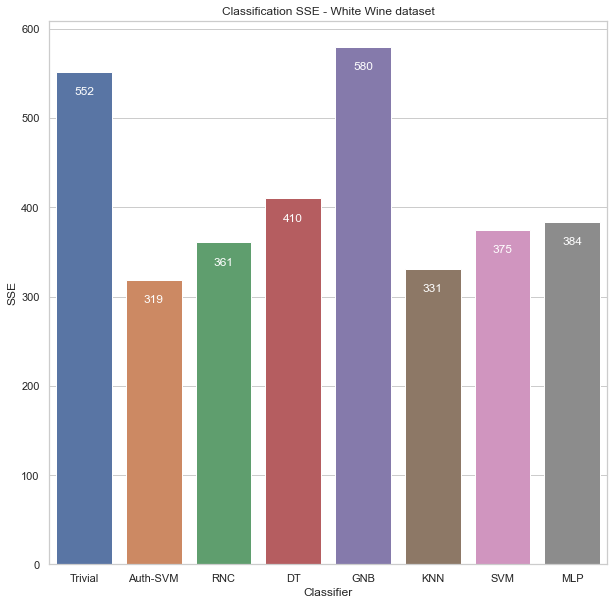

   Classifier Color  Accuracy  SSE
1     Trivial   Red  0.428571  250
3    Auth-SVM   Red  0.630252  103
7         RNC   Red  0.642857   97
9          DT   Red  0.617647  144
11        GNB   Red  0.588235  140
13        KNN   Red  0.689076   89
15        SVM   Red  0.647059   99
17        MLP   Red  0.638655  101


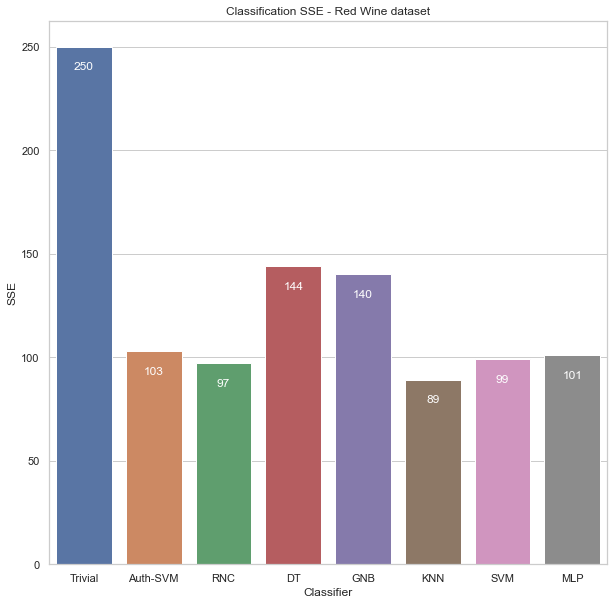

<Figure size 720x720 with 0 Axes>

In [16]:
# SSE
plot_metrics(score_df, 'SSE', 'White')
plot_metrics(score_df, 'SSE', 'Red')